<a href="https://colab.research.google.com/github/arushnab/bonn-eeg-ml/blob/main/notebooks/week05_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Upload Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving extract_features.py to extract_features.py
Saving preprocess.py to preprocess.py
Saving trainmodel.py to trainmodel.py
Saving utils.py to utils.py
Saving w4_logreg_zs.pkl to w4_logreg_zs.pkl
Saving w4_logreg_zs_Xtest.pkl to w4_logreg_zs_Xtest.pkl
Saving w4_logreg_zs_ytest.pkl to w4_logreg_zs_ytest.pkl


rm: cannot remove 'trainmodel.py': No such file or directory
rm: cannot remove 'extract_features.py': No such file or directory
rm: cannot remove 'preprocess.py': No such file or directory
rm: cannot remove 'utils.py': No such file or directory


###Upload and store

In [ ]:
import joblib

model = joblib.load("w4_logreg_zs.pkl")
X_test = joblib.load("w4_logreg_zs_Xtest.pkl")
y_test = joblib.load("w4_logreg_zs_ytest.pkl")

###Predict

In [ ]:
y_pred = model.predict(X_test)
#probablity for class 1
y_probs = model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import seaborn as sns 
import json
import os
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score)

def plot_confusion_matrix(y_test, y_pred, normalize=False):
    cm = confusion_matrix(y_test, y_pred, normalize = 'true' if normalize else None)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap = 'Blues')
    plt.title("Confusion Matrix" + (" (Normalized)" if normalize else ""))
    plt.show()

def plot_roc_curve(y_test, y_probs):
    fpr, tpr, = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plot.plot([0, 1], [0, 1], '--', color='gray') #diagonal baseline for random guessing
    plt.xlabel("False Posiitve Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()    
    plt.grid(True)
    plt.show()

def print_metrics_table(y_test, y_

###Evaluate + Save Metrics

In [ ]:
import importlib
import utils
importlib.reload(utils)

from utils import print_metrics_table, save_metrics_to_json


metrics = print_metrics_table(y_test, y_pred)
save_metrics_to_json(y_test, y_pred)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Metrics saved to results/w4_logreg_zs_metrics.json


###Visualize Confusion Matrices

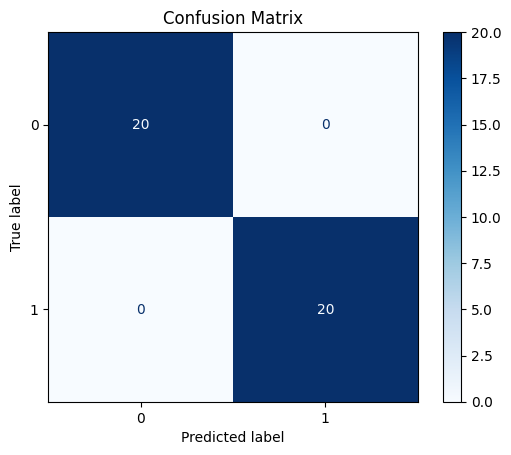

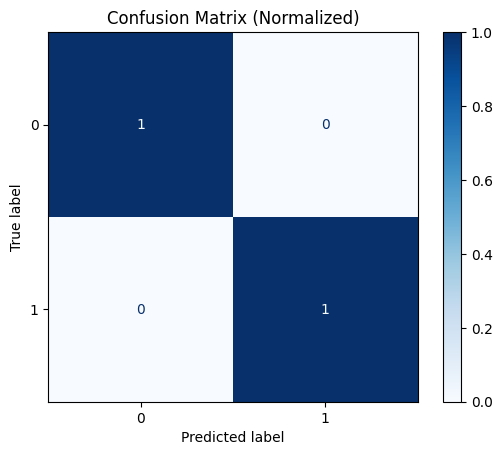

In [ ]:
from utils import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred, normalize=False)
plot_confusion_matrix(y_test, y_pred, normalize=True)

###ROC Curve + AUC

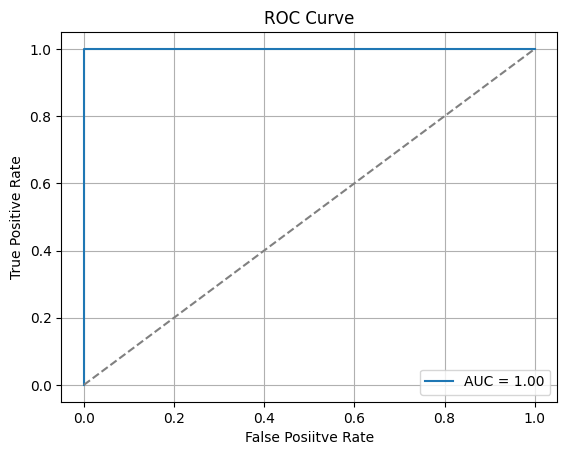

In [ ]:
from utils import plot_roc_curve
plot_roc_curve(y_test, y_probs)

###Visualize True vs. Predicted Plots

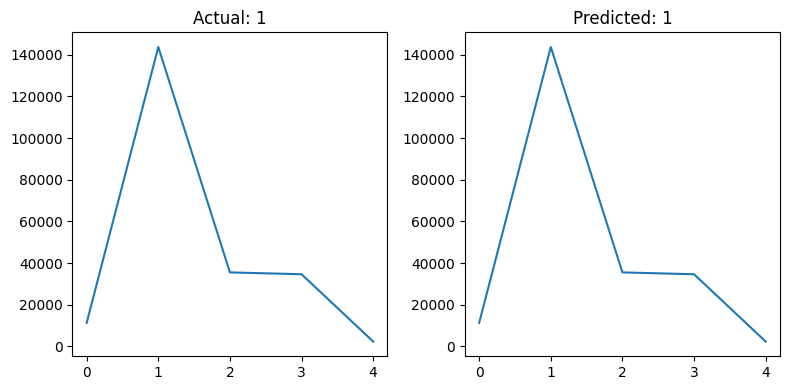

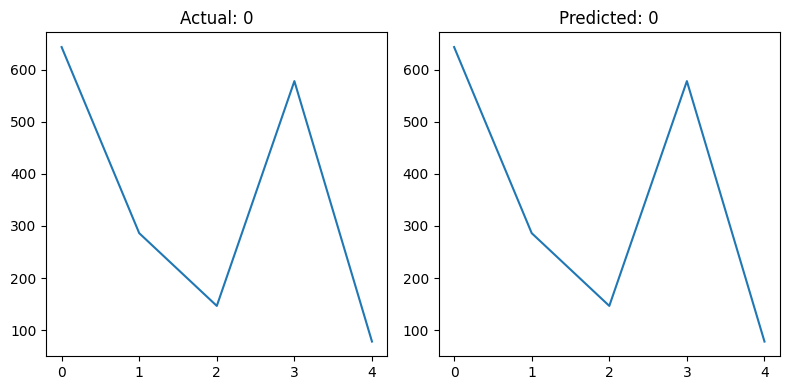

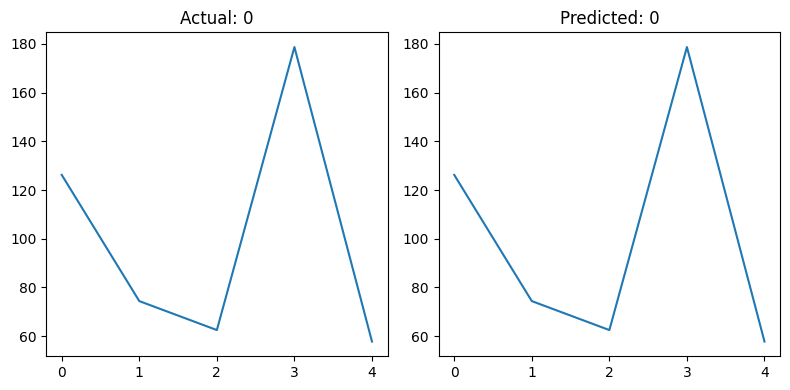

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pick 3 random test samples
indices = np.random.choice(len(y_test), size=3, replace=False)

for i in indices:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Left: Actual
    axes[0].plot(X_test[i])
    axes[0].set_title(f"Actual: {y_test[i]}")

    # Right: Predicted
    axes[1].plot(X_test[i])
    axes[1].set_title(f"Predicted: {y_pred[i]}")

    plt.tight_layout()
    plt.show()

